# Matplotlib - 3 Interactive plots, animations

In [ ]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np


## Motion in space.
Consider a point evolving in space, whose coordinates are given by the position vector
$$
\mathbf{r}(t) = [x(t), y(t), z(t)].
$$
Its *velocity* is the vector
$$
\mathbf{v}(t) = [x'(t), y'(t), z'(t)].
$$
Its acceleration is the vector
$$
\mathbf{a}(t) = [x''(t), y''(t), z''(t)].
$$



In [ ]:
plt.close('all')
def r(t):
    return np.array([np.cos(t), np.sin(t), t/np.pi])
def v(t):
    return np.array([-np.sin(t), np.cos(t), 1/np.pi])
def a(t):
    return np.array([-np.cos(t), -np.sin(t), 0])


# fig = plt.figure() 
# ax = fig.add_subplot(projection='3d')
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

def plot(t):
    TT = np.linspace(-2*np.pi,2*np.pi,501)
    ax.plot(r(TT)[0], r(TT)[1], r(TT)[2], linewidth=2, color='black')

    ax.quiver(0,0,0, *r(t), color='green', linewidth=3, label = 'r(t)')
    ax.quiver(*r(t), *v(t), color='blue', linewidth=3, label = 'v(t)')
    ax.quiver(*r(t), *a(t), color='red', linewidth=3, label = 'a(t)')
    ax.legend()

plot(np.pi)

In [ ]:
from ipywidgets import interact
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})


def plot(t):
    ax.cla()
    TT = np.linspace(-2*np.pi,2*np.pi,501)
    ax.plot(r(TT)[0], r(TT)[1], r(TT)[2], linewidth=2, color='black')
    ax.quiver(0,0,0, *r(t), color='green', linewidth=3, label = 'r(t)')
    ax.quiver(*r(t), *v(t), color='blue', linewidth=3, label = 'v(t)')
    ax.quiver(*r(t), *a(t), color='red', linewidth=3, label = 'a(t)')
    # ax.quiver(*r(t), *np.cross(v(t),a(t)), color='black', linewidth=3, label = 'a(t)')
    ax.legend()
# plot(t)
interact(plot, t = (-2*np.pi,2*np.pi, 0.1))


## Lissajou curves: 

Lissajou's curves are parametric curves with equation
$$
x(t) = \sin(nt),\ y(t) = \sin(mt)
$$
with $n,m \in \mathbb{N}$.

In [ ]:
fig, ax = plt.subplots()
n = 8
m = 3
def plot(n,m):
    ax.cla()
    T = np.linspace(0,2*np.pi, 1001)
    ax.plot(np.sin(n*T), np.sin(m*T))
    ax.set_aspect('equal', 'box')
    ax.set_title(f'Lissajou ({n},{m})')
interact(plot, n = (1,10,1), m = (1,10,1))

In [ ]:
import scipy
def G(x,y):
    return y

n = 21
x = np.linspace(0,2,n)
y = np.linspace(-1,1,n)
X, Y = np.meshgrid(x, y)

fig, ax = plt.subplots()

y0 = 0.2
def plot(y0):
    ax.cla()
    plt.quiver(X,Y,np.ones(n*n),G(X,Y), color = 'red')
    xx = np.linspace(0,2,21)
    sol = scipy.integrate.odeint(lambda y,t: G(t,y), y0, xx)
    plt.plot(xx,sol,'.-')
    ax.set_aspect('equal', 'box')
    ax.axis([0,2,-1,1])
# plot(0.1,11)
interact(plot, y0 = (-1,1,0.05))

In [ ]:
import scipy
def G(x,y):
    return x+y

n = 21
x = np.linspace(-3,3,n)
y = np.linspace(-3,3,n)
X, Y = np.meshgrid(x, y)

fig, ax = plt.subplots()

y0 = 0.
def plot(y0):
    ax.cla()
    plt.quiver(X,Y,np.ones(n**2),G(X,Y), color = 'red')
    xx = np.linspace(-3,3,101)
    sol = scipy.integrate.odeint(lambda y,t: G(t,y), y0, xx)
    plt.plot(xx,sol, '.-')
    ax.set_aspect('equal', 'box')
    ax.axis([-3,3,-3,3])
interact(plot, y0 = (-3,3,0.05))

## Animations
import matplotlib.animation as animation



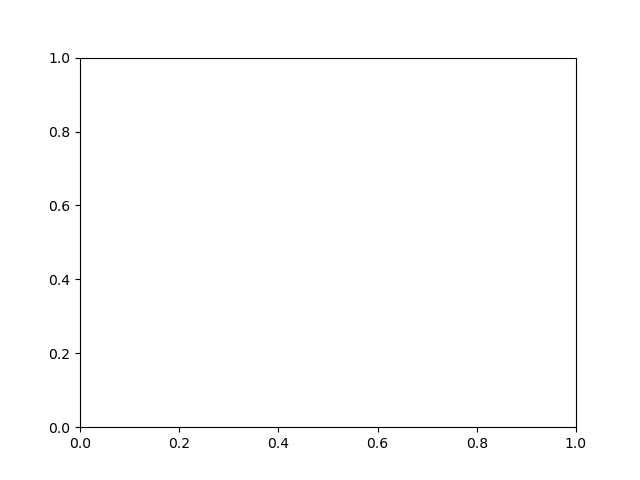

In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation

plt.close('all')
fig, ax = plt.subplots()

n = 8
m = 3
# def init():
    
def plot(t):
    ax.cla()
    T = np.linspace(0,2*np.pi, 1001)
    ax.plot(np.sin(n*T), np.sin(m*T))
    ax.scatter(np.sin(n*t), np.sin(m*t))
    ax.set_aspect('equal', 'box')
    ax.set_title(f'Lissajou ({n},{m})')

ani = FuncAnimation(fig, plot, frames=np.linspace(-np.pi, np.pi, 128), blit=False, repeat=True)

MovieWriter ffmpeg unavailable; using Pillow instead.
MovieWriter ffmpeg unavailable; using Pillow instead.


ValueError: unknown file extension: .mov

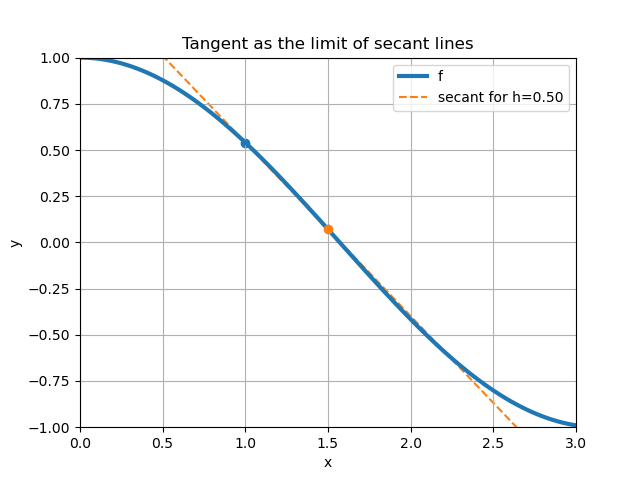

In [ ]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation

plt.close('all')
fig, ax = plt.subplots()

# we will start with cos x from 0 to pi
def f(x):
    return np.cos(x)
def fp(x):
    return -np.sin(x)
    
def tanplot(h):
    ax.cla()
    X = np.linspace(0,np.pi, 101) 
    ax.plot(X,f(X), linewidth=3,label = 'f')
    x0 = 1
    plt.scatter(x0,f(x0))
    if h != 0:
        plt.plot(X, f(x0) + (f(x0+h) - f(x0))/h * (X-x0),label = f'secant for h={h:.2f}', linestyle='--',zorder = 0)
    else:
        ax.plot(X,f(x0) + fp(x0) * (X-x0), label='tangent', linestyle='-', linewidth=3)
    plt.scatter(x0+h, f(x0+h), marker='o',zorder = 2)
    ax.grid()
    ax.legend()
    ax.set_title('Tangent as the limit of secant lines')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.axis([0,3,-1,1])

ani = FuncAnimation(fig, tanplot, frames=np.linspace(-0.5, 0.5, 31), blit=False, repeat=True)
ani.save('tangent.gif')


In [5]:
np.linspace(1,0.1,11)

array([1.  , 0.91, 0.82, 0.73, 0.64, 0.55, 0.46, 0.37, 0.28, 0.19, 0.1 ])